## Введение

В рамках своей курсовой работы я планирую выделить разломы Кольского полуострова по речной сети, а затем сопоставить их с данными о сейсмических событиях.

Для этого я скачала датасет с информацией о всех землетрясениях, зафиксированных на территории полуострова, с магнитудой более 0.1 от *Института сейсмологии Хельсинского университета* (https://www.helsinki.fi/fi/seismologian-instituutti) 

Данные можно скачать как в виде таблицы exel, так и в виде текстового файла. Попробуем загрузить в `python`:

In [91]:
import pandas as pd
raw_data = pd.read_excel(r'results.xlsx')
print(raw_data)

     Year  Month  Day  Hour  Minute  Second   Latitude   Longitude  \
0    2024      9    7    22      25    37.0     66.347      31.089   
1    2024      8   10    10      28    53.3     66.419      31.486   
2    2024      8    5     3      38    22.9     68.073      30.510   
3    2024      6   23    23       1    15.4     66.479      31.485   
4    2024      6    7    19      42    27.9     66.527      30.658   
..    ...    ...  ...   ...     ...     ...        ...         ...   
297  1873      4    5                           66.500      34.500   
298  1873      2   21     2                     68.700      33.300   
299  1772      2   18    17                     68.700      33.300   
300  1626      5   14                           66.000      35.500   
301  1542                                       66.000      35.000   

      Max. magnitude  Magnitude type   Depth  
0                0.8              LH      10  
1                1.8              LH      10  
2                0

Для каждого землетрясения данные содержат дату и время, географические координаты эпицентра, магнитуду и глубину очага

In [93]:
raw_data.columns

Index(['Year', ' Month', ' Day', ' Hour', ' Minute', ' Second', ' Latitude',
       ' Longitude', ' Max. magnitude', ' Magnitude type', ' Depth'],
      dtype='object')

Для самых древних землетрясений отсутствуют некоторые данные, например, глубина очага и точное время. Поэтому загрузим только те строки, где присутствуют все необходимые характеристики (данные с 1960 года). Сделаем это в в формате `.txt` и поделим на отдельные элементы:

In [448]:
with open('results.txt', encoding='utf8') as f:
    data = f.read()
newdata = data.replace('\t', ' ')
readydata = newdata.split('\n')
readydata

['2024 9 7 22 25  37.0  66.347  31.089  0.8  LH 10',
 '2024 8 10 10 28  53.3  66.419  31.486  1.8  LH 10',
 '2024 8 5 3 38  22.9  68.073  30.51  0.6  LH 10',
 '2024 6 23 23 1  15.4  66.479  31.485  1.3  LH 10',
 '2024 6 7 19 42  27.9  66.527  30.658  0.5  LH 10',
 '2024 5 18 7 46  27.6  66.378  31.688  0.8  LH 9',
 '2024 4 26 4 49  56.7  67.223  33.445  1.0  LH 10',
 '2024 4 19 4 54  32.5  67.536  31.714  1.2  LH 10',
 '2024 3 3 18 16  54.2  66.538  31.685  1.9  LH 10',
 '2023 9 27 11 32  25.5  66.278  31.222  1.5  LH 10',
 '2023 9 2 6 55  15.0  67.209  32.542  2.1  LH 10',
 '2023 8 16 0 23  03.8  66.236  32.355  1.1  LH 10',
 '2023 8 10 4 34  02.3  66.841  30.354  0.5  LH 10',
 '2023 7 24 2 9  33.0  66.584  33.154  1.2  LH 10',
 '2023 6 11 20 50  51.5  66.405  30.556  0.6  LH 10',
 '2023 5 20 3 6  47.5  66.616  31.551  0.6  LH 10',
 '2023 4 7 11 8  48.0  66.416  30.545  0.4  LH 10',
 '2023 4 6 13 53  33.1  66.44  30.768  0.7  LH 10',
 '2023 4 4 14 12  31.3  66.374  31.986  0.8  LH 10'

In [450]:
dataaa = []
for earthquake in readydata:
    element = earthquake.split()
    for i in element:
        dataaa.append(i)
dataaa

['2024',
 '9',
 '7',
 '22',
 '25',
 '37.0',
 '66.347',
 '31.089',
 '0.8',
 'LH',
 '10',
 '2024',
 '8',
 '10',
 '10',
 '28',
 '53.3',
 '66.419',
 '31.486',
 '1.8',
 'LH',
 '10',
 '2024',
 '8',
 '5',
 '3',
 '38',
 '22.9',
 '68.073',
 '30.51',
 '0.6',
 'LH',
 '10',
 '2024',
 '6',
 '23',
 '23',
 '1',
 '15.4',
 '66.479',
 '31.485',
 '1.3',
 'LH',
 '10',
 '2024',
 '6',
 '7',
 '19',
 '42',
 '27.9',
 '66.527',
 '30.658',
 '0.5',
 'LH',
 '10',
 '2024',
 '5',
 '18',
 '7',
 '46',
 '27.6',
 '66.378',
 '31.688',
 '0.8',
 'LH',
 '9',
 '2024',
 '4',
 '26',
 '4',
 '49',
 '56.7',
 '67.223',
 '33.445',
 '1.0',
 'LH',
 '10',
 '2024',
 '4',
 '19',
 '4',
 '54',
 '32.5',
 '67.536',
 '31.714',
 '1.2',
 'LH',
 '10',
 '2024',
 '3',
 '3',
 '18',
 '16',
 '54.2',
 '66.538',
 '31.685',
 '1.9',
 'LH',
 '10',
 '2023',
 '9',
 '27',
 '11',
 '32',
 '25.5',
 '66.278',
 '31.222',
 '1.5',
 'LH',
 '10',
 '2023',
 '9',
 '2',
 '6',
 '55',
 '15.0',
 '67.209',
 '32.542',
 '2.1',
 'LH',
 '10',
 '2023',
 '8',
 '16',
 '0',
 '23',

## Общий анализ

Теперь мы можем создавать список для каждой характеристики и анализировать! 
Найдём землетрясение с наибольшей амплитудой и в каком году оно произошло:

In [204]:
magnitudes = []
for element in range(8, len(dataaa), 11):
    magn = dataaa[element]
    magnitudes.append(magn)
print('Максимальная магнитуда землетрясения:', max(magnitudes))
index = magnitudes.index(max(magnitudes))
years = []
for element in range(0, len(dataaa), 11):
    year = dataaa[element]
    years.append(year)
print('Оно произошло в', years[index], 'году')

Максимальная магнитуда землетрясения: 5.2
Оно произошло в 1967 году


*При землетрясении с магнитудой 5 наблюдаются умеренные разрушения*

In [444]:
sum_magn = 0
for i in range(len(magnitudes)):
    earthquake = float(magnitudes[i])
    sum_magn += earthquake
avg_magnitude = sum_magn/len(magnitudes)
print('Средняя амплитуда землетрясений:', round(avg_magnitude, 2))

Средняя амплитуда землетрясений: 1.67


*Землетрясения с амплитудой 1-2 относятся к категории слабых, регистрируемых только приборами.* Значит мы можем говорить о слабой сейсмической активности региона

Создадим словарь, в котором года будут ключами, а количество землетрясений в них - значениями. Так можно будет легко анализировать количество сейсмических событий за любой период 

In [245]:
dictt = {}
for i in range(len(years)):
    year = years[i]
    if year in dictt:
        pass
    else:
        counted = years.count(year)
        dictt.update({year:counted})
dictt

{'2024': 9,
 '2023': 12,
 '2022': 10,
 '2021': 9,
 '2020': 11,
 '2019': 20,
 '2018': 12,
 '2017': 11,
 '2016': 13,
 '2015': 11,
 '2014': 11,
 '2013': 3,
 '2012': 5,
 '2011': 4,
 '2010': 5,
 '2009': 8,
 '2008': 31,
 '2007': 9,
 '2006': 5,
 '2005': 11,
 '2004': 5,
 '2003': 3,
 '2002': 6,
 '2001': 5,
 '2000': 1,
 '1999': 6,
 '1998': 2,
 '1997': 1,
 '1996': 1,
 '1995': 3,
 '1994': 2,
 '1993': 2,
 '1991': 1,
 '1990': 1,
 '1989': 4,
 '1988': 4,
 '1986': 2,
 '1985': 2,
 '1983': 1,
 '1982': 1,
 '1981': 2,
 '1978': 2,
 '1975': 1,
 '1974': 3,
 '1973': 1,
 '1972': 2,
 '1971': 2,
 '1970': 1,
 '1969': 1,
 '1968': 4,
 '1967': 1,
 '1966': 1,
 '1965': 1,
 '1963': 1,
 '1962': 1,
 '1960': 2}

Значит наиболее сейсмически активный год...

In [294]:
max_year = max(dictt.values())
for key, value in dictt.items():
    if value == max_year:
        print('Наиболее сейсмически активный год:', key, '\nВ нём зафиксировано', max_year, 'землетрясение')

Наиболее сейсмически активный год: 2008 
В нём зафиксировано 31 землетрясение


## Современность
А как дела с современной сейсмической активностью? Найдём количество зафиксированных в 21 веке землетрясений и их среднюю амплитуду 

In [227]:
count = 0
for element in range(len(years)):
    earthquake = int(years[element])
    if earthquake >= 2000:
        count+=1
    else:
        break
print('Количество землетрясений в 21 веке:', count)

summa = 0
for element in range(len(magnitudes)):
    earthquake = float(magnitudes[element])
    if element <= 229:
        summa += earthquake
    if element > 229:
        break
avg_mag = summa/230
print('Средняя амплитуда землетрясений в 21 веке:', round(avg_mag, 2))

Количество землетрясений в 21 веке: 230
Средняя амплитуда землетрясений в 21 веке: 1.35


Построим диаграмму изменения средней амплитуды землетрясений за каждый год с помощью словаря!

In [369]:
another_dictt = {}
for i in range(len(years)):
    year = years[i]
    magn = float(magnitudes[i])
    if year in another_dictt:
        another_dictt[year] += magn
    else:
        another_dictt.update({year:magn})
        another_dictt[year] = magn
keys = list(another_dictt.keys())
medium_magnitude = [another_dictt[key] / dictt[key] for key in keys]
middle_mag_dict = dict()
for i in range(len(keys)):
    middle_mag_dict[keys[i]] = round(medium_magnitude[i], 2)
print(middle_mag_dict)

{'2024': 1.1, '2023': 0.96, '2022': 1.09, '2021': 1.01, '2020': 1.35, '2019': 1.26, '2018': 1.03, '2017': 1.45, '2016': 1.38, '2015': 1.09, '2014': 1.05, '2013': 1.1, '2012': 1.02, '2011': 1.38, '2010': 0.98, '2009': 1.43, '2008': 1.62, '2007': 1.5, '2006': 1.3, '2005': 1.43, '2004': 2.5, '2003': 2.37, '2002': 1.9, '2001': 1.84, '2000': 3.3, '1999': 2.68, '1998': 3.05, '1997': 2.6, '1996': 1.9, '1995': 3.0, '1994': 1.9, '1993': 1.8, '1991': 2.4, '1990': 4.1, '1989': 2.9, '1988': 2.55, '1986': 2.6, '1985': 2.35, '1983': 2.8, '1982': 2.6, '1981': 3.45, '1978': 2.65, '1975': 2.7, '1974': 3.43, '1973': 3.7, '1972': 2.5, '1971': 3.15, '1970': 2.7, '1969': 2.4, '1968': 3.1, '1967': 5.2, '1966': 3.6, '1965': 2.9, '1963': 2.9, '1962': 4.5, '1960': 3.65}


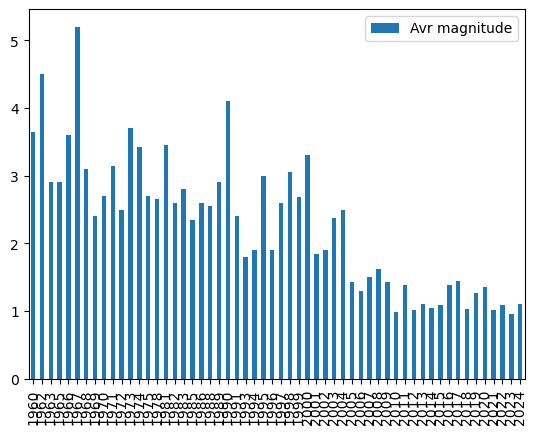

In [386]:
out = pd.DataFrame({'Avr magnitude': list(middle_mag_dict.values())[::-1]}, index=list(middle_mag_dict.keys())[::-1]).plot.bar()

Теперь мы можем хорошо видеть, что сейсмическая активность на полуострове постепенно затухает. А связано это с замедлением процессов гляциоизостазии (поднятие земной коры вследствие отхода ледника), которые провоцируют напряжения в земной коре и как следствие её сдвиги (землетрясения).

## Выводы

Таким образом, я при помощи языка `python` привела данные к виду, подходящему для анализа различных характеристик землетрясений на Кольском полуострове. 
Например, можно находить самые сильные и разрушительные сейсмические события.

С помощью словаря `dictt` можно анализировать количество зафиксированных землетрясений за те или иные периоды. А словарь `middle_mag_dict` позволяет анализировать и визуализировать изменения сейсмической активности во времени, что я собственно и сделала.
